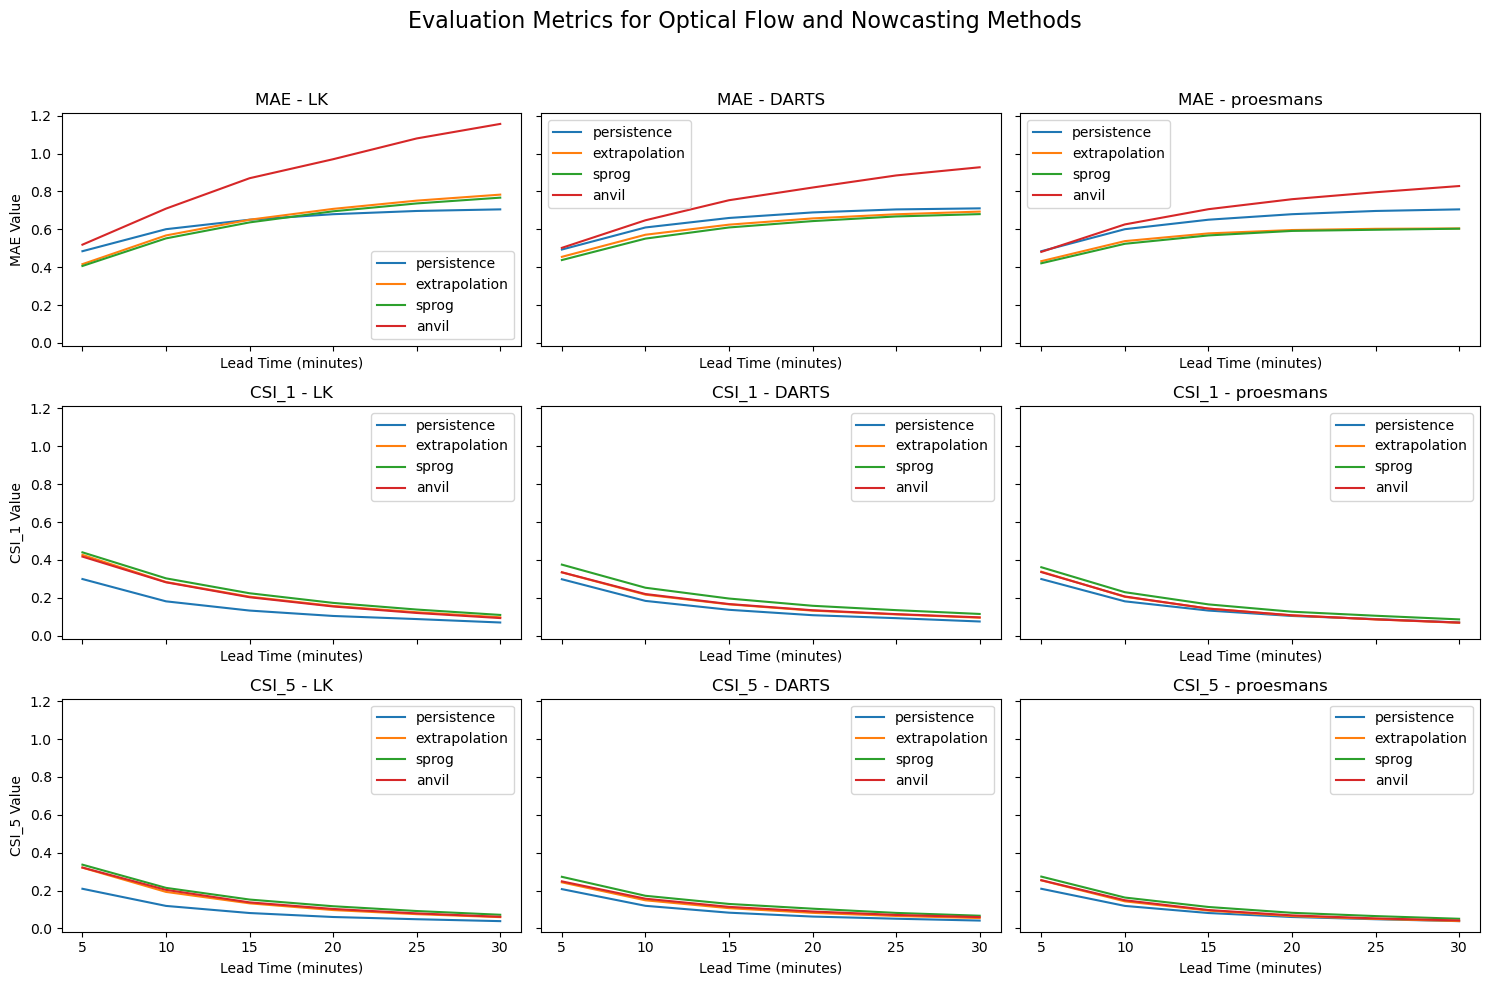

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constants
results_dir = os.path.join(os.getcwd(), "Results")
evaluation_metrics = ["MAE", "CSI_1", "CSI_5"]
oflow_methods = ["LK", "DARTS", "proesmans"]
nc_methods = ["persistence", "extrapolation", "sprog", "anvil"]
n_leadtimes = 6
lead_time_intervals = [5 * (i + 1) for i in range(n_leadtimes)]  # 5-minute intervals

# Dictionary to store mean values
metrics_dict = {metric: {of_method: {nc_method: None for nc_method in nc_methods} for of_method in oflow_methods} for metric in evaluation_metrics}

# Process each metric file
for metric in evaluation_metrics:
    file_path = os.path.join(results_dir, f"{metric}_results.xlsx")
    xls = pd.ExcelFile(file_path)
    
    for sheet_name in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name=sheet_name)
        
        # Parse sheet_name to get oflow_method and nc_method
        of_method, nc_method = sheet_name.split("_")
        
        # Calculate mean for each lead time
        mean_values = df.iloc[:, 1:].mean(axis=0).values  # Exclude 'Event' column
        metrics_dict[metric][of_method][nc_method] = mean_values

# Plotting
fig, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle("Evaluation Metrics for Optical Flow and Nowcasting Methods", fontsize=16)

for i, metric in enumerate(evaluation_metrics):
    for j, of_method in enumerate(oflow_methods):
        ax = axes[i, j]
        for nc_method in nc_methods:
            mean_values = metrics_dict[metric][of_method][nc_method]
            ax.plot(lead_time_intervals, mean_values, label=nc_method)
        
        ax.set_title(f"{metric} - {of_method}")
        ax.set_xlabel("Lead Time (minutes)")
        if j == 0:
            ax.set_ylabel(f"{metric} Value")
        ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(os.path.join(results_dir, "evaluation_metrics_plot.png"))
plt.show()

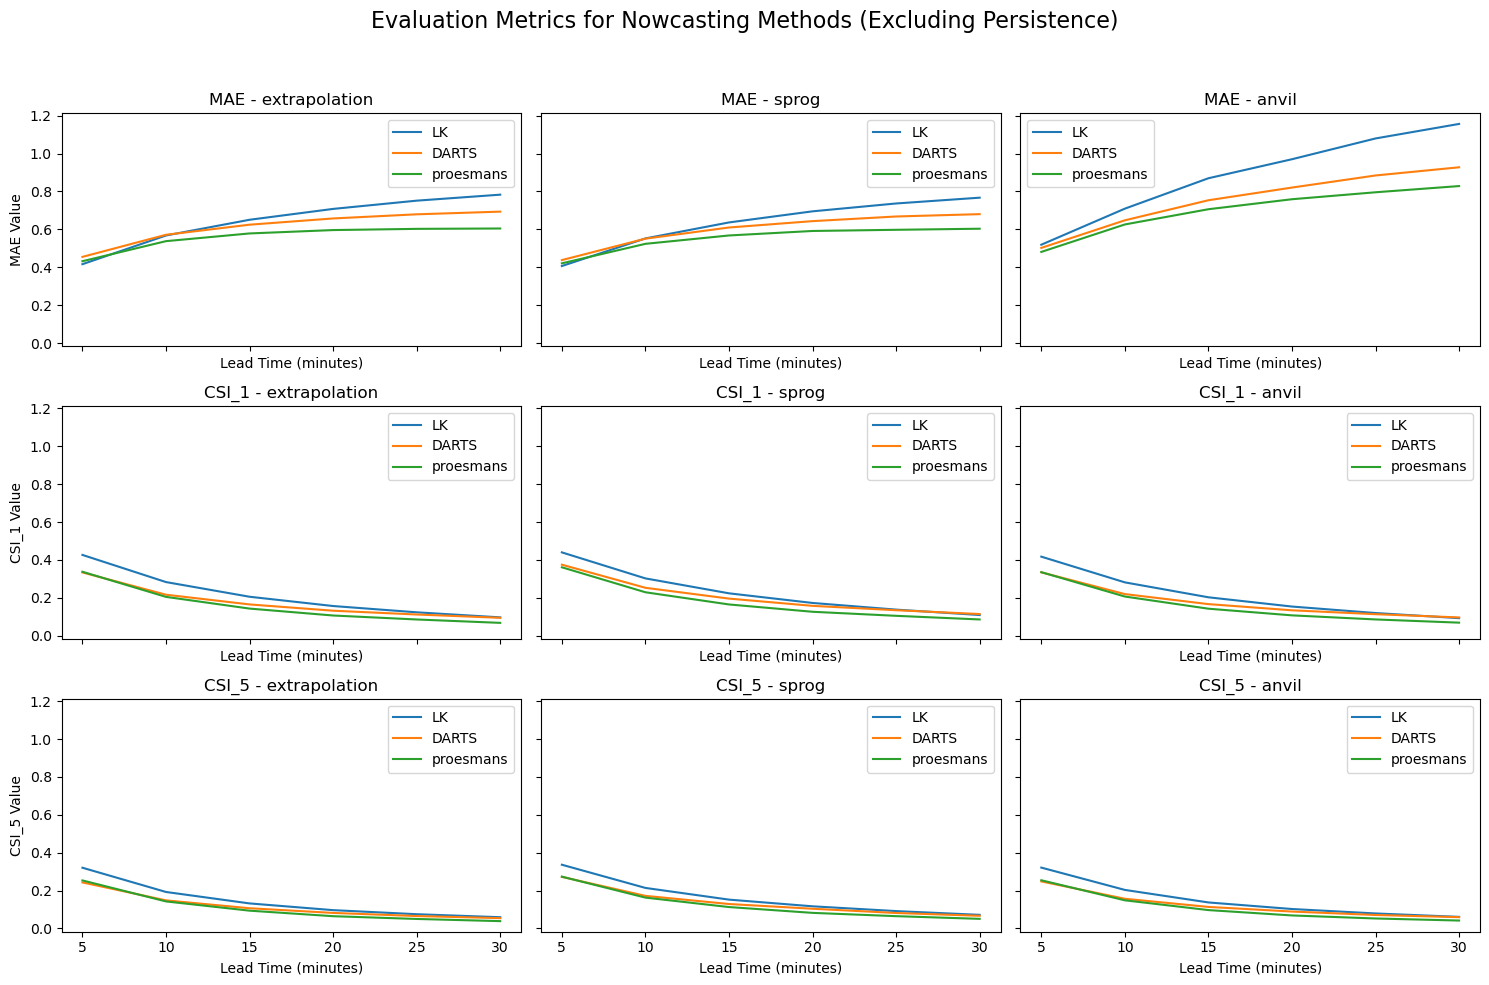

In [2]:
# Create a list of nowcasting methods excluding 'persistence'
filtered_nc_methods = ["extrapolation", "sprog", "anvil"]

# Plotting
fig, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle("Evaluation Metrics for Nowcasting Methods (Excluding Persistence)", fontsize=16)

for i, metric in enumerate(evaluation_metrics):
    for j, nc_method in enumerate(filtered_nc_methods):
        ax = axes[i, j]
        for of_method in oflow_methods:
            mean_values = metrics_dict[metric][of_method][nc_method]
            ax.plot(lead_time_intervals, mean_values, label=of_method)
        
        ax.set_title(f"{metric} - {nc_method}")
        ax.set_xlabel("Lead Time (minutes)")
        if j == 0:
            ax.set_ylabel(f"{metric} Value")
        ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(os.path.join(results_dir, "evaluation_metrics_filtered_plot.png"))
plt.show()